In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading(Data Source: JHU)

In [2]:
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed_df  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,472,502,558,558,610,648,691,745,745,778
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,620,627,650,654,682,688,694,705,714,715
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,537,545,550,550,568,576,596,604,615,617
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,13,13,13,13,14,14,17,17,17


In [4]:
cols       = recoveries_df.keys()
recoveries = recoveries_df.loc[:, cols[4]:]
confirmed  = confirmed_df.loc[:, cols[4]:]
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,0,0,0,0,0,0,0,0,0,0,...,472,502,558,558,610,648,691,745,745,778
1,0,0,0,0,0,0,0,0,0,0,...,620,627,650,654,682,688,694,705,714,715
2,0,0,0,0,0,0,0,0,0,0,...,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507
3,0,0,0,0,0,0,0,0,0,0,...,537,545,550,550,568,576,596,604,615,617
4,0,0,0,0,0,0,0,0,0,0,...,11,13,13,13,13,14,14,17,17,17


# COVID19 Country/Region Recoveries Comparison

## Legend:

- GREEN: Above (or equal) the global recovery rate 
- RED: Lower than the global recovery rate
- BLUE (Horizontal line): Zero Cases

Mean Recovery Rate = 0.2659831622129788


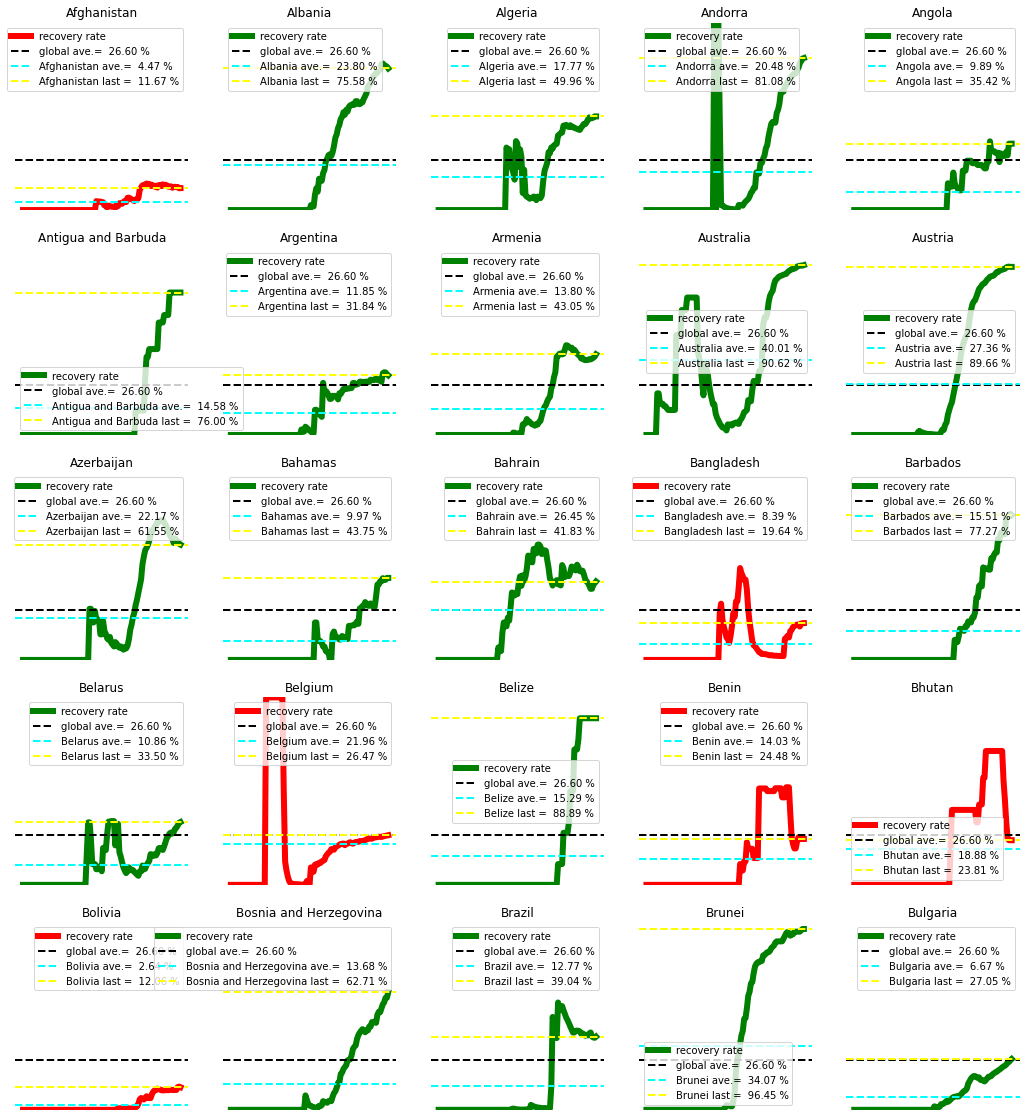

In [5]:
dates       = recoveries.keys()
country_reg = recoveries_df['Country/Region'].unique()

world_cases     = [confirmed[i].sum() for i in dates]
world_recovered = [recoveries[i].sum() for i in dates] 

recovery_rate  = np.array(world_recovered)/np.array(world_cases)
mean_recovery_rate = np.mean(recovery_rate)

print('Mean Recovery Rate =', mean_recovery_rate)


def plot_cases(start = 0, batch_sz= 25, columns = 5): 
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_reg):
            country = country_reg[idx-1]
            total_recoveries = [recoveries_df[recoveries_df['Country/Region']==country][i].sum() for i in dates]
            covid_cases  = [confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates]
            recoveries_arr = np.array(total_recoveries)
            cases_arr  = np.array(covid_cases)
            recovery_rate  = pd.Series(np.divide(recoveries_arr, cases_arr, out=np.zeros(recoveries_arr.shape), where=cases_arr!=0))
            country_recovery_rate = np.mean(recovery_rate)
            recent = recovery_rate.iloc[-1]
            
            if recent < mean_recovery_rate:
                color = 'red'
            else:
                color = 'green'
                
            eps = 0.00001
            if np.mean(recoveries_arr) - 0 < eps:
                color = 'blue'
                          
            fig.add_subplot(rows, columns, i)
            plt.plot(range(len(dates)), recovery_rate, linewidth=6, color = color)
            plt.axhline(y = mean_recovery_rate,linestyle='--', color='black', linewidth=2)
            plt.axhline(y = country_recovery_rate,linestyle='--', color='cyan', linewidth=2)
            plt.axhline(y = recent,linestyle='--', color='yellow', linewidth=2)
            plt.legend(['recovery rate', f'global ave.= {100*mean_recovery_rate: 0.2f} %', 
                        f'{country} ave.= {100*country_recovery_rate: 0.2f} %',
                       f'{country} last = {100*recent: 0.2f} %'])
            plt.title(f'{country}')
            plt.ylim([0, 1])
            plt.axis('off')

    plt.show()
    
k = 0    
plot_cases(k)

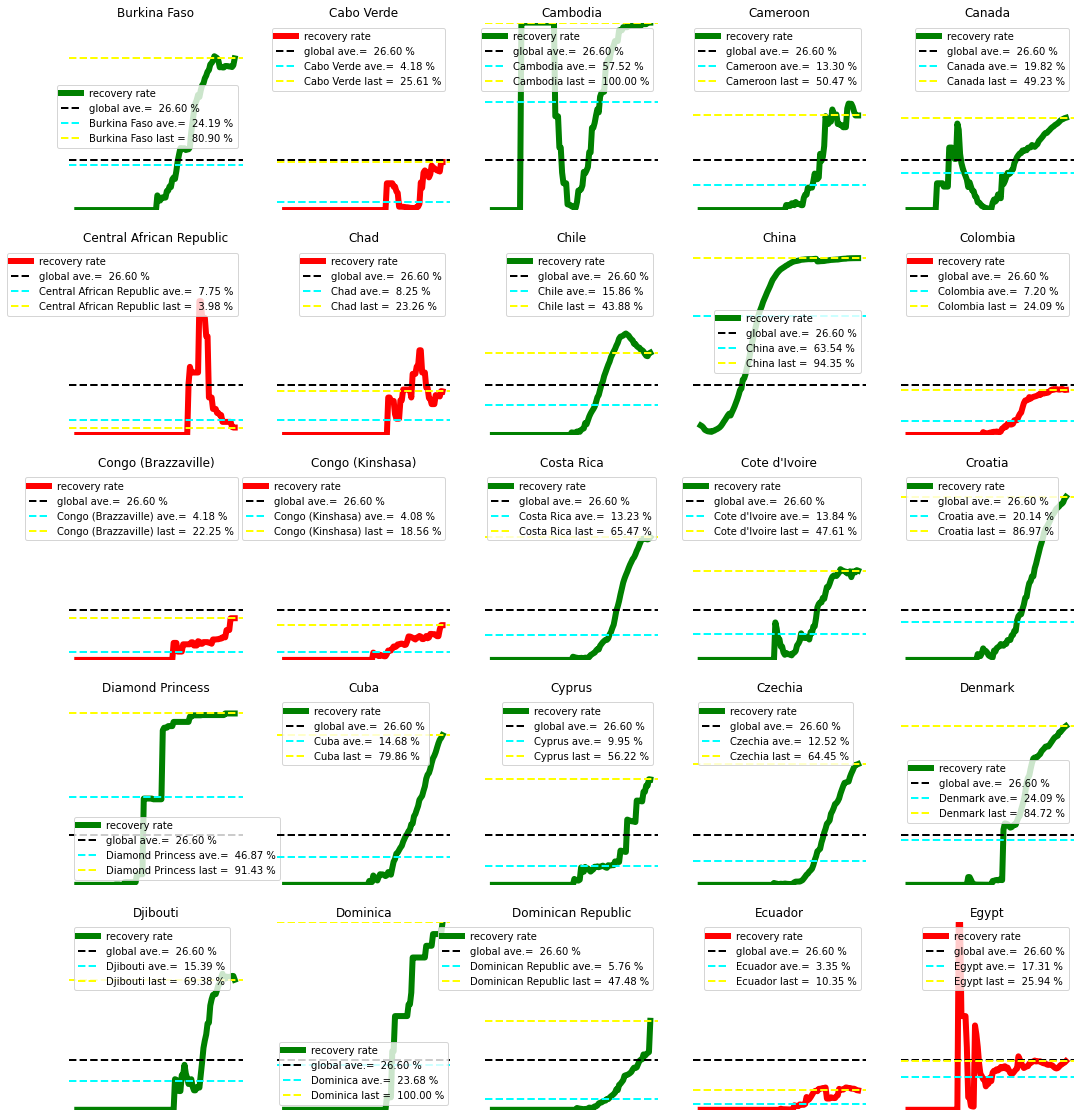

In [6]:
k += 25
plot_cases(k)

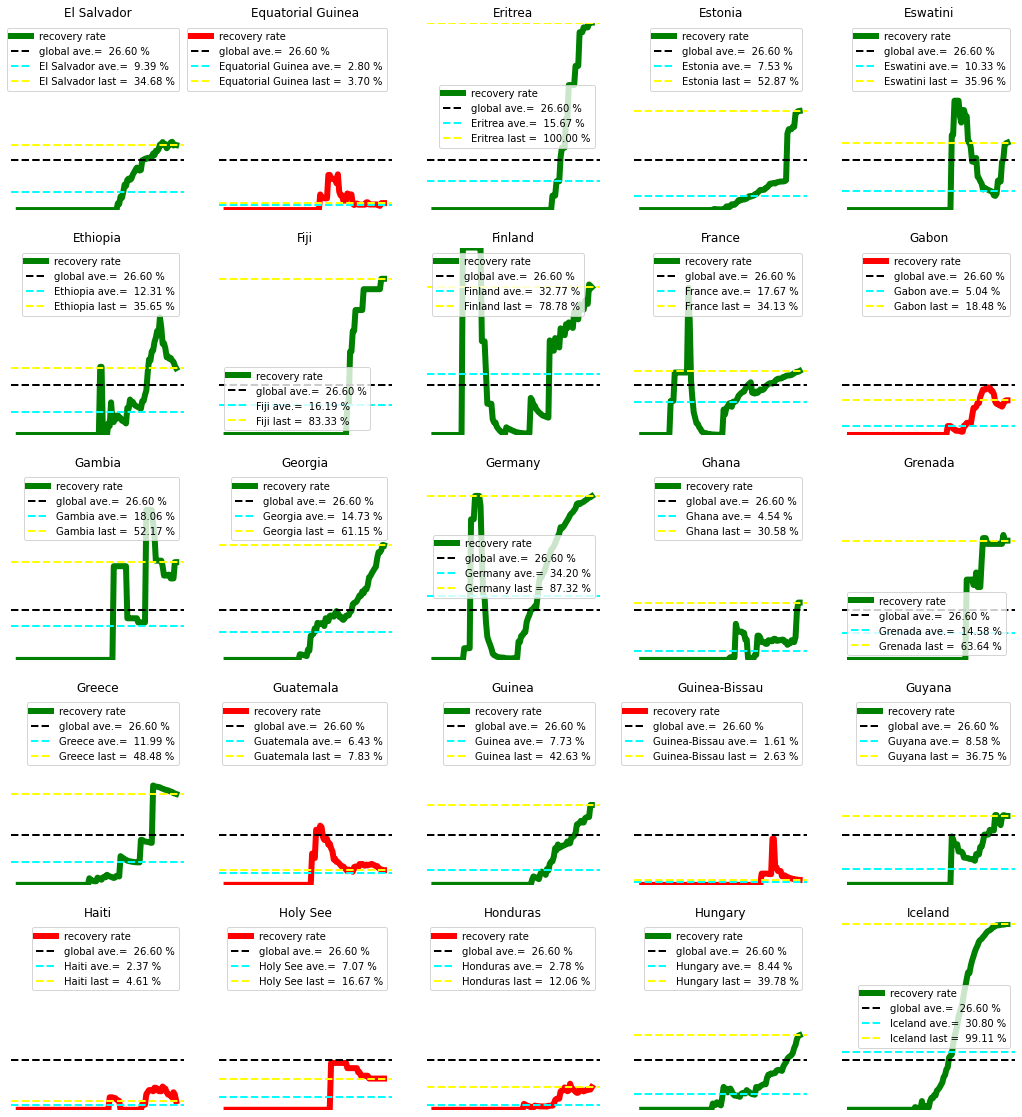

In [7]:
k += 25
plot_cases(k)

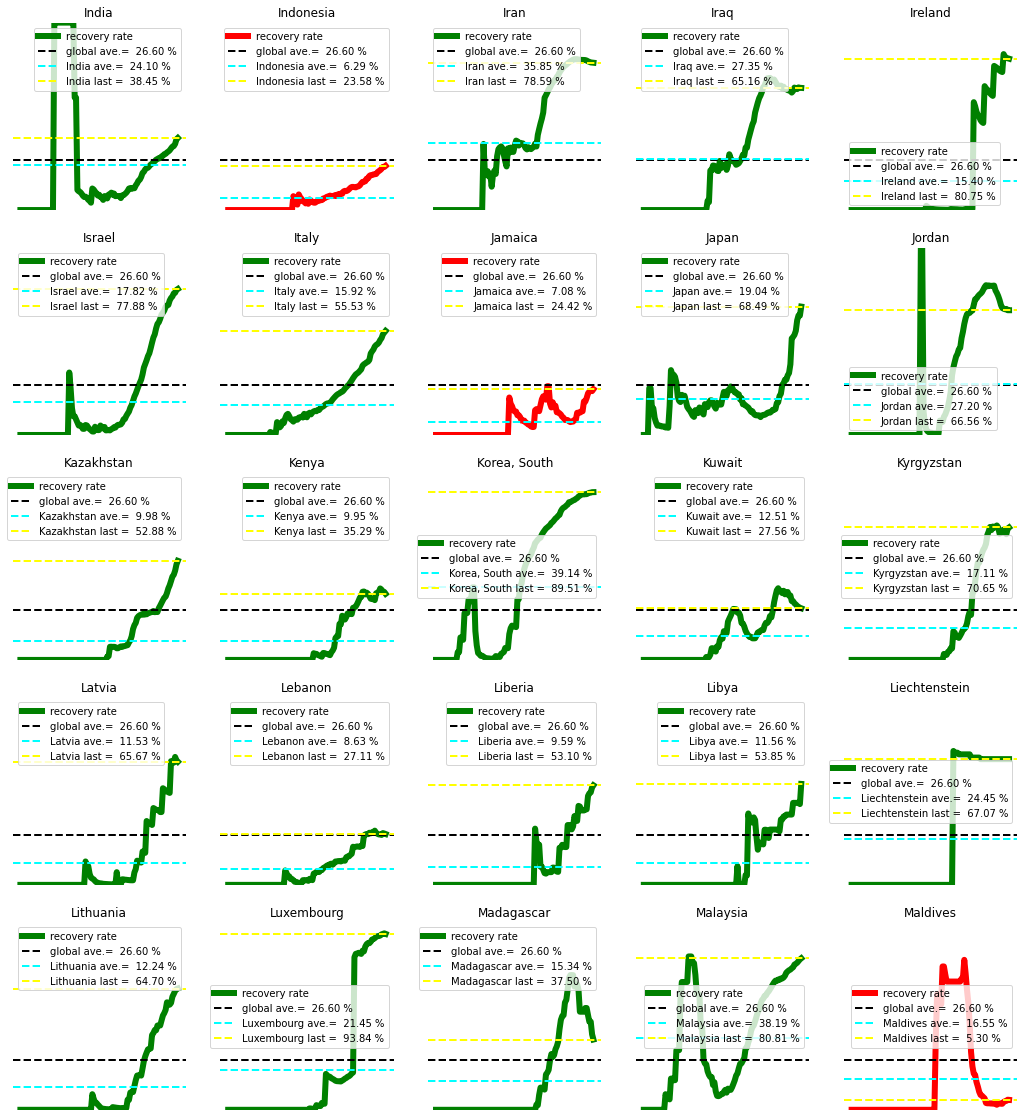

In [8]:
k += 25
plot_cases(k)

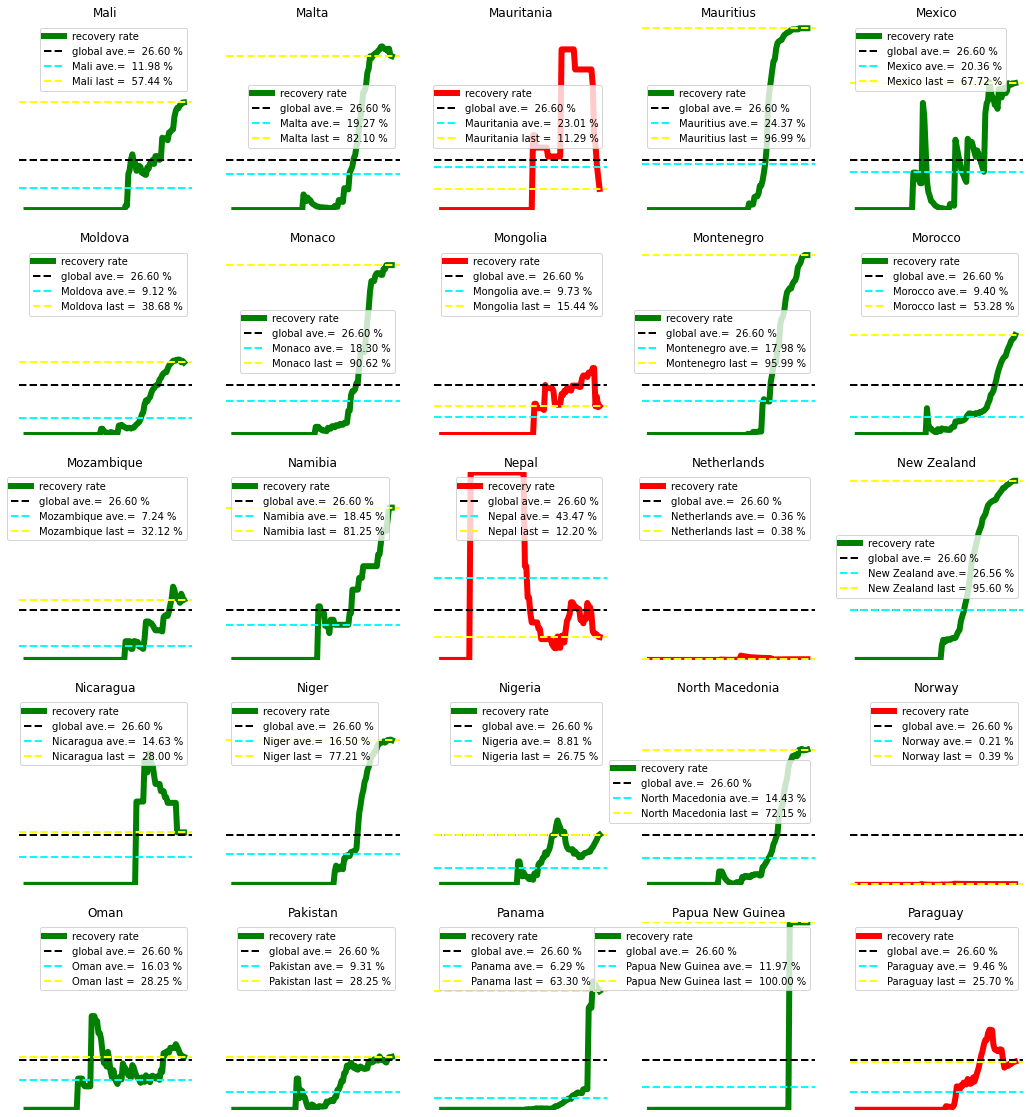

In [9]:
k += 25
plot_cases(k)

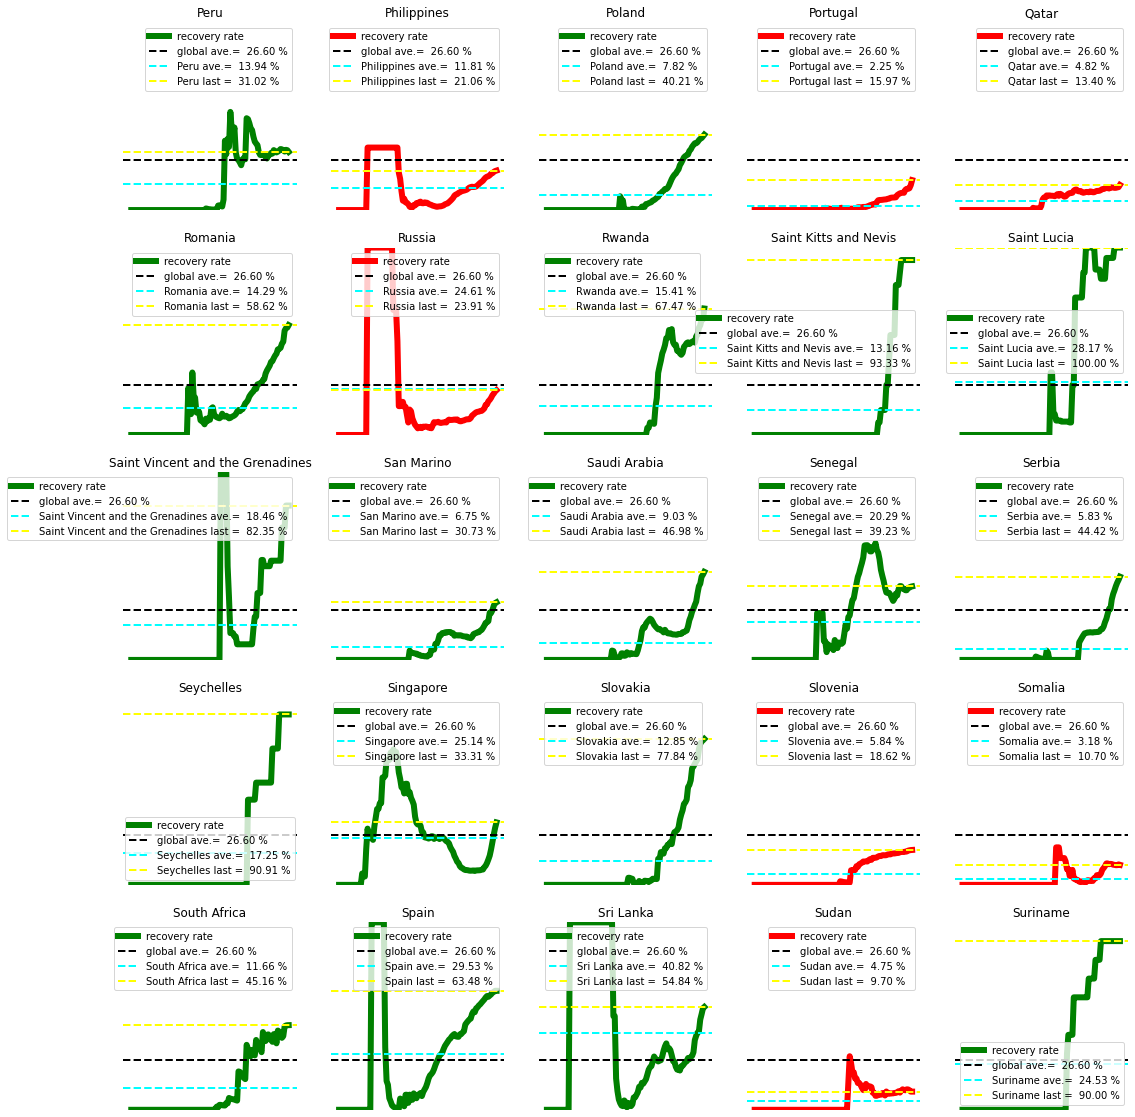

In [10]:
k += 25
plot_cases(k)

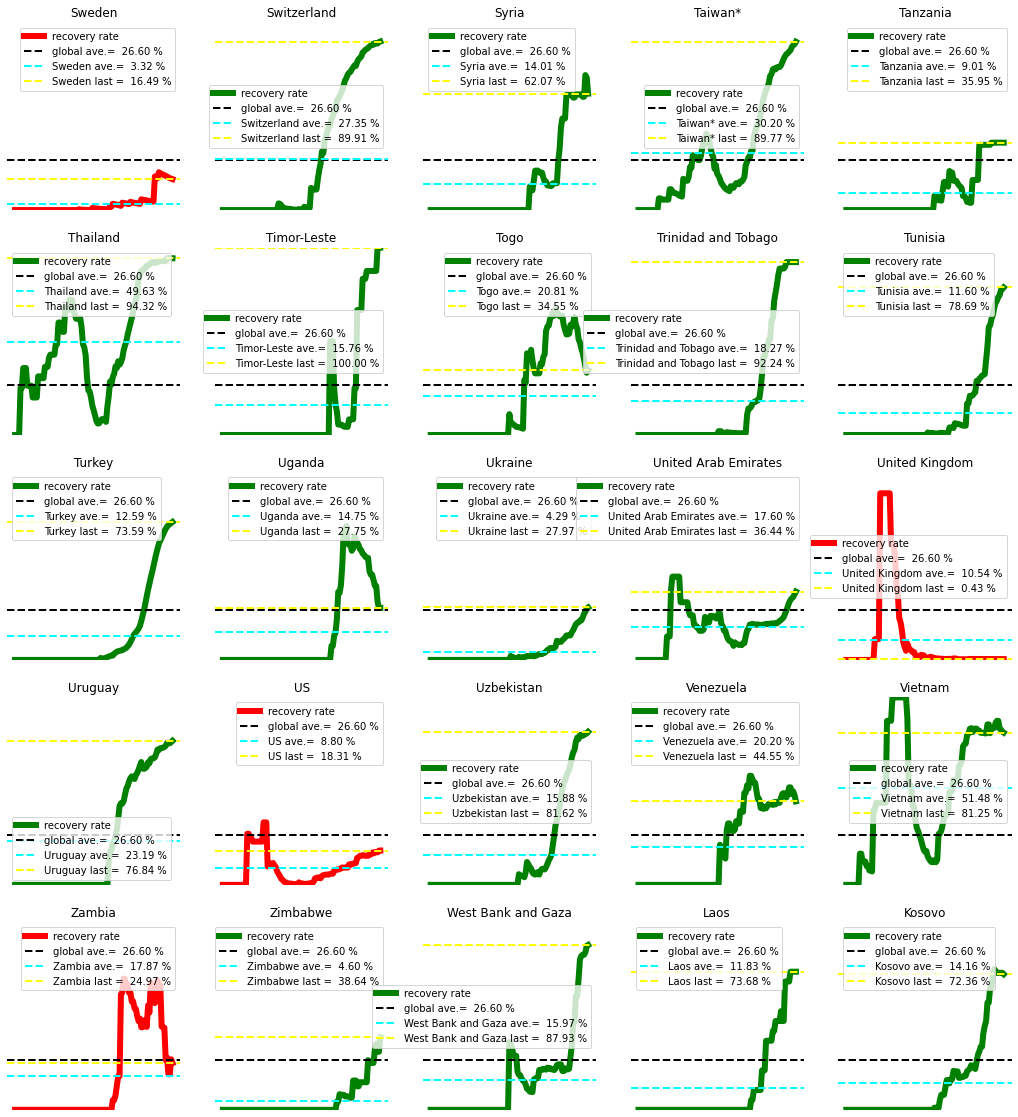

In [11]:
k += 25
plot_cases(k)

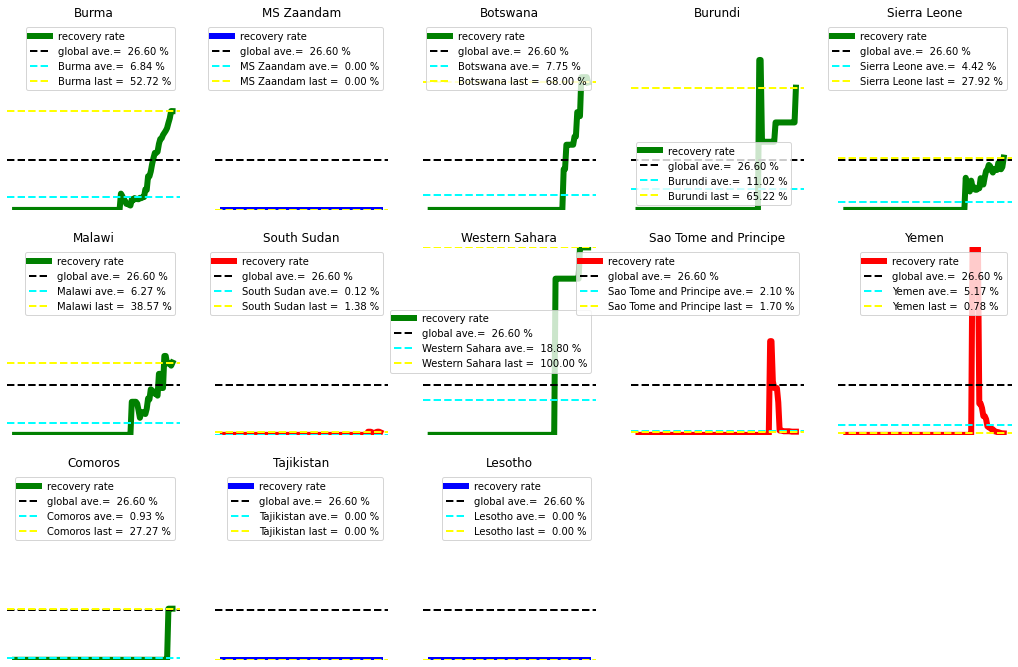

In [12]:
k += 25
plot_cases(k)

# COVID19 ASEAN Cases Comparison

Mean Recovery Rate (Global) =  26.60 %


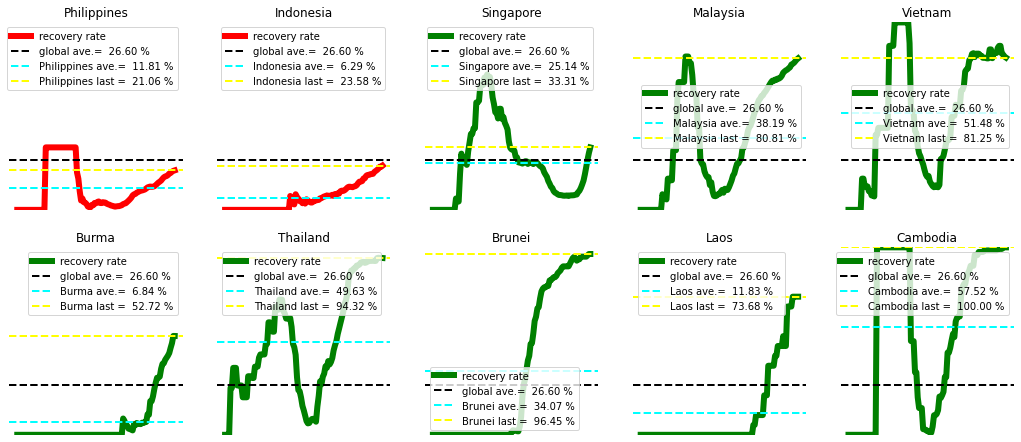

In [13]:
ASEAN = ['Philippines', 'Indonesia',  'Singapore', 'Malaysia', 'Vietnam', 'Burma', 'Thailand', 'Brunei', 'Laos', 'Cambodia']

def plot_cases2(country_list, start = 0, batch_sz= 25, columns = 5): 
    
    print(f'Mean Recovery Rate (Global) = {100*mean_recovery_rate: 0.2f} %')
    
    rows    = int(np.ceil(batch_sz/columns))
    fig     = plt.figure(figsize=(18, 4*rows))
    color   = None

    for i in range(1, columns*rows + 1):
        idx = start + i
        if idx <= len(country_list):
            country = country_list[idx-1]
            total_recoveries = [recoveries_df[recoveries_df['Country/Region']==country][i].sum() for i in dates]
            covid_cases  = [confirmed_df[confirmed_df['Country/Region']==country][i].sum() for i in dates]
            recoveries_arr = np.array(total_recoveries)
            cases_arr  = np.array(covid_cases)
            recovery_rate  = pd.Series(np.divide(recoveries_arr, cases_arr, out=np.zeros(recoveries_arr.shape), where=cases_arr!=0))
            country_recovery_rate = np.mean(recovery_rate)
            recent = recovery_rate.iloc[-1]
            
            if recent < mean_recovery_rate:
                color = 'red'
            else:
                color = 'green'
                
            eps = 0.00001
            if np.mean(recoveries_arr) - 0 < eps:
                color = 'blue'
                          
            fig.add_subplot(rows, columns, i)
            plt.plot(range(len(dates)), recovery_rate, linewidth=6, color = color)
            plt.axhline(y = mean_recovery_rate,linestyle='--', color='black', linewidth=2)
            plt.axhline(y = country_recovery_rate,linestyle='--', color='cyan', linewidth=2)
            plt.axhline(y = recent,linestyle='--', color='yellow', linewidth=2)
            plt.legend(['recovery rate', f'global ave.= {100*mean_recovery_rate: 0.2f} %', 
                        f'{country} ave.= {100*country_recovery_rate: 0.2f} %',
                       f'{country} last = {100*recent: 0.2f} %'])
            plt.title(f'{country}')
            plt.ylim([0, 1])
            plt.axis('off')

    plt.show()
    
    
plot_cases2(ASEAN)

Mean Recovery Rate (Global) =  26.60 %


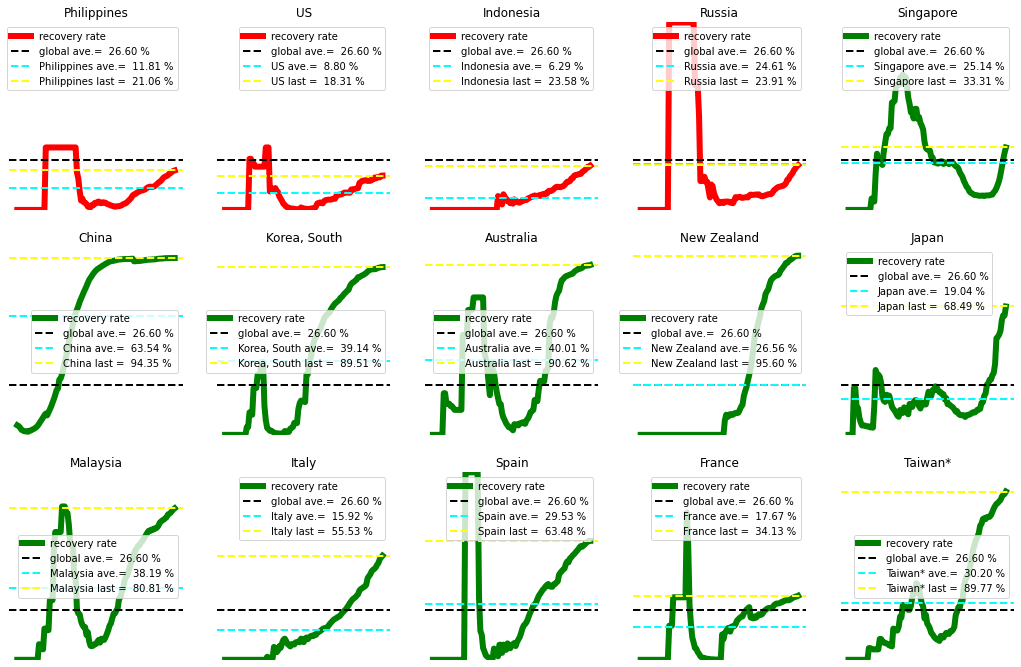

In [15]:
Assorted = [ 'Philippines', 'US', 'Indonesia', 'Russia', 'Singapore',  
            'China', 'Korea, South',  'Australia', 'New Zealand',
            'Japan','Malaysia', 'Italy', 'Spain', 'France', 'Taiwan*']

plot_cases2(Assorted)

> Disclaimer: *Educational purposes ONLY and is not intended to be used in any other purpose, including but not limited to any political agenda and so on*.